# Initialization

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix
from seaborn import scatterplot

from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

from sklearn.metrics import mean_absolute_error

from joblib import dump

import matplotlib.pyplot as plt

In [3]:
# read in the dataset
df_raw = pd.read_csv('./dataset_vehicles.csv')

# shuffle the dataset
df_raw = df_raw.sample(frac=1, random_state=2)
df_raw.reset_index(drop=True, inplace=True)

# Data Cleaning

In [4]:
df_raw.shape

(18938, 19)

In [5]:
df_raw.head()

,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date
0,Honda Fit Shuttle Full Option 2015 for sale,"Posted on 30 May 2:39 pm, Alutgama, Kalutara","Rs 5,600,000",Honda,Fit Shuttle,Full Option,2015,Used,Automatic,Station wagon,Hybrid,"1,490 cc","107,222 km","Alutgama, Kalutara","HONDA FIT SHUTTLE GP7Rs. 5,600,000/= (Negotiab...",https://ikman.lk/en/ad/honda-fit-shuttle-full-...,kasun,Premium-Member,2021-05-30 14:39:00
1,Kia Sorento 1 to 12 tan premium 2011 for sale,"Posted on 18 Jun 4:01 pm, Horana, Kalutara","Rs 9,800,000",Kia,Sorento,1 to 12 tan premium,2011,Used,Automatic,SUV / 4x4,Diesel,"2,200 cc","114,586 km","Horana, Kalutara",sorento tan primium 1 -12 option engineer used...,https://ikman.lk/en/ad/kia-sorento-1-to-12-tan...,Thilina Chamara,Premium-Member,2021-06-18 16:01:00
2,Suzuki Estilo Zen 2010 for sale,"Posted on 17 Mar 3:19 pm, Kuliyapitiya, Kurune...","Rs 2,175,000",Suzuki,Estilo,Zen Estilo,2010,Used,Manual,Hatchback,Petrol,"1,000 cc","134,000 km","Kuliyapitiya, Kurunegala",New Tyres... New Battery ...Power Shutters..Po...,https://ikman.lk/en/ad/suzuki-estilo-zen-2010-...,Malith Welandage,Premium-Member,2021-03-17 15:19:00
3,Micro MX 7 Mark 2 2013 for sale,"Posted on 24 Jul 5:40 pm, Kottawa, Colombo","Rs 2,350,000",Micro,MX 7,Mark 2,2013,Used,Manual,Saloon,Petrol,"1,500 cc","45,000 km","Kottawa, Colombo",Motor CarRegistered on 2013 December First Owner,https://ikman.lk/en/ad/micro-mx-7-mark-2-2013-...,Ravi Hettiarachchi,Premium-Member,2021-07-24 17:40:00
4,Toyota Harrier LEXUS 2002 for sale,"Posted on 23 Jul 8:32 pm, Negombo, Gampaha","Rs 5,390,000",Toyota,Harrier,LEXUS,2002,Used,Automatic,SUV / 4x4,Petrol,"2,000 cc","170,000 km","Negombo, Gampaha",20023RD OWNERTOYOTA COMPANY MAINTAIN LEATHER E...,https://ikman.lk/en/ad/toyota-harrier-lexus-20...,NIROSHAN MOTOR TRADERS,Premium-Member,2021-07-23 20:32:00


In [6]:
df_raw.columns

Index(['Title', 'Sub_title', 'Price', 'Brand', 'Model', 'Edition', 'Year',
       'Condition', 'Transmission', 'Body', 'Fuel', 'Capacity', 'Mileage',
       'Location', 'Description', 'Post_URL', 'Seller_name', 'Seller_type',
       'published_date'],
      dtype='object')

## Possible columns to ignore

From initial inspection, by looking at the contents of the columns, the following are the columns I'm thinking of removing from the dataset. I don't feel these columns are very useful for the models.

- Title
- Sub_title
- Description
- Post_URL
- Seller_name
- Seller_type
- Published_date
- Location

In [7]:
df_raw.dtypes

Title             object
Sub_title         object
Price             object
Brand             object
Model             object
Edition           object
Year               int64
Condition         object
Transmission      object
Body              object
Fuel              object
Capacity          object
Mileage           object
Location          object
Description       object
Post_URL          object
Seller_name       object
Seller_type       object
published_date    object
dtype: object

From looking at the datatypes, there are certainly going to be columns that need to be cast to more fitting datatypes. The year is an integer and the rest are strings. This won't do for columns like **Price**, for example. This column will make up the target vector and won't be suitable as a string. It will need to be cast to a either a float or an integer. Probably a float. However, first there is some other tidying up to do.

In [8]:
df_raw.describe(include='all')

,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date
count,18938,18938,18938,18938,18938,13908,18938.000000,18938,18938,17043,18938,18938,18938,18938,18938,18938,18938,18938,18938
unique,10329,17014,1831,57,516,6336,NaN,3,4,7,6,432,3850,198,17075,17911,6103,1,15060
top,Suzuki Alto 2015 for sale,"Posted on 03 Mar 11:21 am, Colombo 3, Colombo","Rs 650,000",Toyota,Alto,G Grade,NaN,Used,Automatic,Hatchback,Petrol,"1,500 cc","100,000 km","Kohuwala, Colombo",* Leasing can be arranged with your requiremen...,https://ikman.lk/en/ad/toyota-pixis-g-intelige...,LB Finance PLC,Premium-Member,2021-03-03 11:21:00
freq,184,63,92,5762,962,172,NaN,17991,11412,6712,13823,3861,450,1333,151,4,512,18938,69
mean,NaN,NaN,NaN,NaN,NaN,NaN,2007.718344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,11.640139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1927.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
raw_features = ['Title', 'Sub_title', 'Price', 'Brand', 'Model', 'Edition', 'Year',
               'Condition', 'Transmission', 'Body', 'Fuel', 'Capacity', 'Mileage',
               'Location', 'Description', 'Post_URL', 'Seller_name', 'Seller_type',
               'published_date']

In [10]:
for feature in raw_features:
    print(feature, df_raw[feature].unique())

Title ['Honda Fit Shuttle Full Option 2015 for sale'
 'Kia Sorento 1 to 12 tan premium 2011 for sale'
 'Suzuki Estilo Zen 2010 for sale' ...
 'Toyota Land Cruiser Prado Face Lift 2015 2010 for sale'
 'Datsun Redi Go Used 2016 for sale' 'Nissan March Beatle 2002 for sale']
Sub_title ['Posted on 30 May 2:39 pm, Alutgama, Kalutara'
 'Posted on 18 Jun 4:01 pm, Horana, Kalutara'
 'Posted on 17 Mar 3:19 pm, Kuliyapitiya, Kurunegala' ...
 'Posted on 13 Feb 1:14 pm, Matugama, Kalutara'
 'Posted on 11 Apr 4:55 pm, Delgoda, Gampaha'
 'Posted on 15 Jul 7:31 am, Maharagama, Colombo']
Price ['Rs 5,600,000' 'Rs 9,800,000' 'Rs 2,175,000' ... 'Rs 2,730,000'
 'Rs 3,135,000' 'Rs 4,435,000']
Brand ['Honda' 'Kia' 'Suzuki' 'Micro' 'Toyota' 'Nissan' 'Audi' 'Mitsubishi'
 'Mercedes Benz' 'Peugeot' 'Zotye' 'Daihatsu' 'Hyundai' 'Perodua' 'BMW'
 'Jaguar' 'Land Rover' 'Maruti Suzuki' 'Mazda' 'Lexus' 'Tata' 'MG' 'DFSK'
 'Proton' 'Mini' 'Chery' 'Ford' 'Citroen' 'Isuzu' 'Volkswagen' 'Daewoo'
 'Datsun' 'Volvo' 'Mahin

Post_URL ['https://ikman.lk/en/ad/honda-fit-shuttle-full-option-2015-for-sale-kalutara-1'
 'https://ikman.lk/en/ad/kia-sorento-1-to-12-tan-premium-2011-for-sale-kalutara'
 'https://ikman.lk/en/ad/suzuki-estilo-zen-2010-for-sale-kurunegala-1' ...
 'https://ikman.lk/en/ad/toyota-land-cruiser-prado-face-lift-2015-2010-for-sale-gampaha-1'
 'https://ikman.lk/en/ad/datsun-redi-go-used-2016-for-sale-colombo'
 'https://ikman.lk/en/ad/nissan-march-beatle-2002-for-sale-kurunegala']
Seller_name ['kasun' 'Thilina Chamara' 'Malith Welandage' ... 'smart security'
 'Gokulesh Soundararajah' 'Ramanayake']
Seller_type ['Premium-Member']
published_date ['2021-05-30 14:39:00' '2021-06-18 16:01:00' '2021-03-17 15:19:00' ...
 '2021-07-05 13:48:00' '2021-02-13 13:14:00' '2021-04-11 16:55:00']


Since there are a lot of unique values for many columns, I don't get all the unique information printed out. However, I get enough information to get a picture of what's contained in each column. I can investigate individual columns more later, if needed.

As mentioned earlier, there are a couple of features where the type can be changed. To achieve this, there is some info in the columns that will need to be removed. For example, the 'Rs' will need to be removed from **Price** feature, as we know the price is in Rupees, and it will prevent the type being changed to a float.

## Remove irrelevant data from features

In [11]:
def remove_irrelevant_info(df, column_name, info):
    df[column_name].replace(f'({info})', '', regex=True, inplace=True)
    
remove_irrelevant_info(df_raw, 'Capacity', 'cc')
remove_irrelevant_info(df_raw, 'Capacity', ',')
remove_irrelevant_info(df_raw, 'Price', 'Rs ')
remove_irrelevant_info(df_raw, 'Price', ',')
remove_irrelevant_info(df_raw, 'Mileage', 'km')
remove_irrelevant_info(df_raw, 'Mileage', ',')

df_raw.reset_index(drop=True, inplace=True)

In [12]:
# Check that the irrelevant information was removed successfully.
df_raw.head()

,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date
0,Honda Fit Shuttle Full Option 2015 for sale,"Posted on 30 May 2:39 pm, Alutgama, Kalutara",5600000,Honda,Fit Shuttle,Full Option,2015,Used,Automatic,Station wagon,Hybrid,1490,107222,"Alutgama, Kalutara","HONDA FIT SHUTTLE GP7Rs. 5,600,000/= (Negotiab...",https://ikman.lk/en/ad/honda-fit-shuttle-full-...,kasun,Premium-Member,2021-05-30 14:39:00
1,Kia Sorento 1 to 12 tan premium 2011 for sale,"Posted on 18 Jun 4:01 pm, Horana, Kalutara",9800000,Kia,Sorento,1 to 12 tan premium,2011,Used,Automatic,SUV / 4x4,Diesel,2200,114586,"Horana, Kalutara",sorento tan primium 1 -12 option engineer used...,https://ikman.lk/en/ad/kia-sorento-1-to-12-tan...,Thilina Chamara,Premium-Member,2021-06-18 16:01:00
2,Suzuki Estilo Zen 2010 for sale,"Posted on 17 Mar 3:19 pm, Kuliyapitiya, Kurune...",2175000,Suzuki,Estilo,Zen Estilo,2010,Used,Manual,Hatchback,Petrol,1000,134000,"Kuliyapitiya, Kurunegala",New Tyres... New Battery ...Power Shutters..Po...,https://ikman.lk/en/ad/suzuki-estilo-zen-2010-...,Malith Welandage,Premium-Member,2021-03-17 15:19:00
3,Micro MX 7 Mark 2 2013 for sale,"Posted on 24 Jul 5:40 pm, Kottawa, Colombo",2350000,Micro,MX 7,Mark 2,2013,Used,Manual,Saloon,Petrol,1500,45000,"Kottawa, Colombo",Motor CarRegistered on 2013 December First Owner,https://ikman.lk/en/ad/micro-mx-7-mark-2-2013-...,Ravi Hettiarachchi,Premium-Member,2021-07-24 17:40:00
4,Toyota Harrier LEXUS 2002 for sale,"Posted on 23 Jul 8:32 pm, Negombo, Gampaha",5390000,Toyota,Harrier,LEXUS,2002,Used,Automatic,SUV / 4x4,Petrol,2000,170000,"Negombo, Gampaha",20023RD OWNERTOYOTA COMPANY MAINTAIN LEATHER E...,https://ikman.lk/en/ad/toyota-harrier-lexus-20...,NIROSHAN MOTOR TRADERS,Premium-Member,2021-07-23 20:32:00


In [13]:
# Change the types of the columns so they are in a more suitable format.
df_raw = df_raw.astype({'Capacity': int, 'Price': float, 'Mileage': int, 'Year': str})
df_raw.reset_index(drop=True, inplace=True)

I tried to convert the 'Year' feature to a datetime object using the code below. However, since I only had a value for a year, the conversion appended 01-01 to the end of the year. As in the year **2020** would come out as **2020-01-01** So, I decided to convert it to a string so there was no reason that the model would interpret it as some ordered value.

In [14]:
# Failed conversion from int to datetime object

# df_raw['Year'] = pd.to_datetime(df_raw['Year'], format='%Y')

In [15]:
df_raw.dtypes

Title              object
Sub_title          object
Price             float64
Brand              object
Model              object
Edition            object
Year               object
Condition          object
Transmission       object
Body               object
Fuel               object
Capacity            int32
Mileage             int32
Location           object
Description        object
Post_URL           object
Seller_name        object
Seller_type        object
published_date     object
dtype: object

I want to investigate the **Edition** column. The reason is I'm not 100% sure if it would be a useful column to use. I'll get the count of each unique value in the column to see what sort of data is held within.

In [16]:
df_raw.value_counts('Edition')

Edition
G Grade              172
Safety               101
Toyota                93
2015                  92
G Superior            88
                    ... 
Falcon Hearse          1
Facelifted Msport      1
Facelift model         1
Facelift VVT           1
J Style                1
Length: 6336, dtype: int64

As I suspected, this column seems to be a bit messy. Of course, different car manufacturers release new editions to their models every few years. And of course, these models would come at different prices and specs. However from the output of the value counts, there are a few of observations I can make:

1. There are just over 13,000 values in the column, as can be seen in the describe() method earlier in the notebook. That is about 5000 of the rows containing a NaN. If I was blindly deleting rows with NaNs in the Edition column, I'd lose too much of the data for my liking.
2. I can't just guess at the missing values, or replace them with the mode of the column. A car either has a certain edition, or it doesn't. There is no way I can replace the NaNs with a value that's 'enough of an edition' value. Also, if I was to go with the mode route, there will be cars who have an edition that isn't even owned by the manufacturer. Maybe I could create a model to predict the edition, but I don't think this would be very useful in all honesty.
3. I feel that a lot of this information can be discerned from other infomation within the dataset. For example, if I know the year, then I would know what edition of the car it is. I'm no expert on the manufacturing policies of the car industries, but I would say that once a new edition of a car is released, the old edition would be halted from manufacturing. 
4. There is a few, and very possibly more rows in the dataset with one instance of a value, for example **Facelift Msport**. I don't think these would be very useful for the models.

As a result, I will remove the **Edition** column from the dataset.

In [17]:
# Select the features that I think would be useful.
# Removing ['Title', 'Sub_title', 'Edition', 'Location', 'Description', Post_URL, Seller_name, Seller_type, published_date]
features = ['Brand', 'Model', 'Year', 'Condition', 'Transmission', 'Body', 
            'Fuel', 'Capacity', 'Mileage', 'Price']

df = df_raw[features].copy()

df.reset_index(drop=True, inplace=True)

## Reasons for deletions of columns

- Title: No useful info. the Titles contain much of the same information that is included in other, useful features.
- Sub_title: Only contains information on when and where it was posted.
- Edition: Can't see this being that useful for the reasons outlined earlier.
- Location: The location in one country of the sale wouldn't have an effect on the value of the car. Possibly if the dataset included listings from other parts of the world.
- Description: The description just repeats a lot of information from useful features and has no bearing on the value.
- Post_URL: Not necessary at all.
- Seller_name: I was conflicted about this, as maybe the seller name would determine if that seller tends to sell cars for higher or lower than it's value. I ultimately decided against it.
- Seller_type: Even if this had an effect, all examples contain a 'Premium Member' feature.
- published_date: Another conflict I had. This may be useful if the value of certain cars increased or decreased dramatically at some stage. However, I didn't see it as being useful in the end.

Now it's time to investigate the data to look for outliers that will have a negative effect on the training.

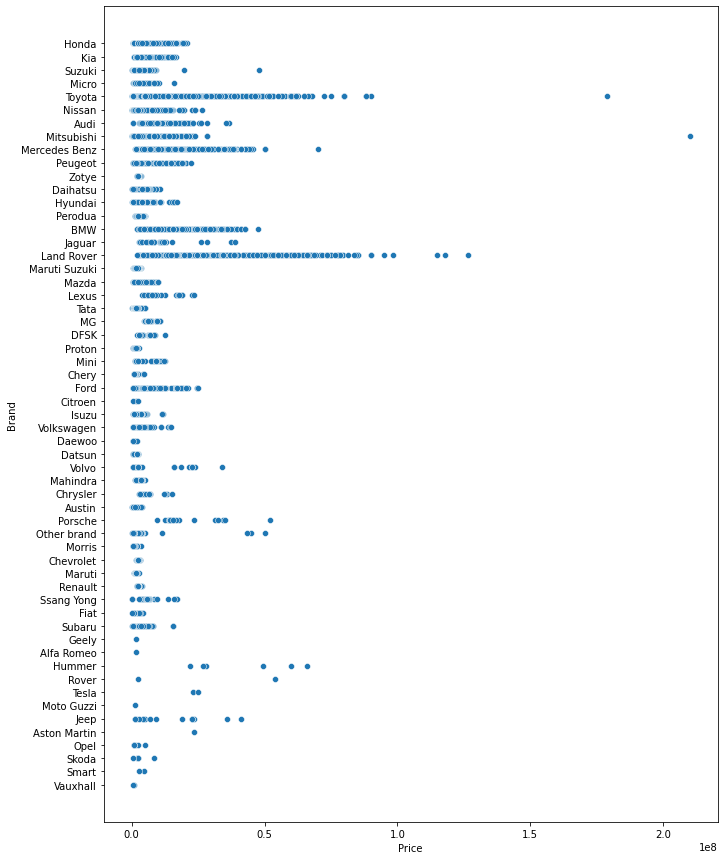

In [18]:
plt.figure(figsize=(11, 15))
plot = scatterplot(x='Price', y='Brand', data=df)

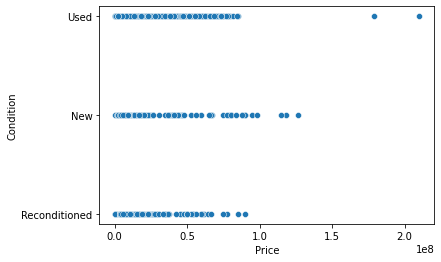

In [19]:
plot = scatterplot(x='Price', y='Condition', data=df)

It seems that, from plotting **Brand** against **Price** and **Condition** against **Price**, there are two cars that are outliers in both categories. These seem incorrect, so I think they need to be looked at in more detail.

In [20]:
df[df['Price'] > 150000000]

,Brand,Model,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Price
583,Toyota,Premio,2020,Used,Automatic,Saloon,Petrol,1500,18000,179000000.0
9227,Mitsubishi,Montero,2015,Used,Automatic,SUV / 4x4,Diesel,3200,80000,210000000.0


An argument can be made for the Toyota Premio, since it was registered in 2020 and it has quite a low mileage, coupled with the fact that it's classed as a luxury car. However, Rs 179000000 is the quivalent of about €5 million. This *definitely* seems wrong, so I'll delete it.

The Mitsubishi doesn't look right either. A 2015 car with quite high mileage wouldn't cost the equivalent of €910000, so I'll get rid of it. 

In [21]:
df = df[df['Price'] < 150000000]
df.reset_index(drop=True, inplace=True)

Now I just want to compute summary data for the columns I have left.

In [22]:
for feature in features:
    print(feature, df[feature].unique())

Brand ['Honda' 'Kia' 'Suzuki' 'Micro' 'Toyota' 'Nissan' 'Audi' 'Mitsubishi'
 'Mercedes Benz' 'Peugeot' 'Zotye' 'Daihatsu' 'Hyundai' 'Perodua' 'BMW'
 'Jaguar' 'Land Rover' 'Maruti Suzuki' 'Mazda' 'Lexus' 'Tata' 'MG' 'DFSK'
 'Proton' 'Mini' 'Chery' 'Ford' 'Citroen' 'Isuzu' 'Volkswagen' 'Daewoo'
 'Datsun' 'Volvo' 'Mahindra' 'Chrysler' 'Austin' 'Porsche' 'Other brand'
 'Morris' 'Chevrolet' 'Maruti' 'Renault' 'Ssang Yong' 'Fiat' 'Subaru'
 'Geely' 'Alfa Romeo' 'Hummer' 'Rover' 'Tesla' 'Moto Guzzi' 'Jeep'
 'Aston Martin' 'Opel' 'Skoda' 'Smart' 'Vauxhall']
Model ['Fit Shuttle' 'Sorento' 'Estilo' 'MX 7' 'Harrier' 'Maruti' 'March' 'Axio'
 'Aqua' 'Wagon R Stingray' 'Hilux' 'Premio' 'Sunny' 'Soluna' 'A6' 'Vitz'
 'Lancer' 'Alto' 'Prius' 'Hustler' 'E300' 'Land Cruiser Sahara' '407'
 'C200' 'Corolla' 'Starlet' 'Extreme' 'Terios' 'Mira' 'Celerio' 'Stellar'
 'Land Cruiser Prado' 'Avanza' 'A3' 'Baleno' 'E200' 'Grace' 'Leaf' 'Panda'
 'Viva Elite' 'X1' 'XF' 'Swift' 'Vezel' 'Range Rover Sport' 'Boon' 'A1'


In [23]:
df.describe(include='all')

,Brand,Model,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Price
count,18936,18936,18936,18936,18936,17041,18936,18936.000000,18936.000000,1.893600e+04
unique,57,516,76,3,4,7,6,NaN,NaN,NaN
top,Toyota,Alto,2015,Used,Automatic,Hatchback,Petrol,NaN,NaN,NaN
freq,5761,962,1843,17989,11410,6712,13822,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1507.744508,96151.160858,6.400106e+06
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,738.601269,76428.832580,8.376581e+06
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,9.900000e+02
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,45200.000000,2.250000e+06
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1490.000000,83000.000000,3.990000e+06
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1800.000000,130000.000000,6.895000e+06


In [24]:
# Checking for nans in the remaining columns
df.isnull().any()

Brand           False
Model           False
Year            False
Condition       False
Transmission    False
Body             True
Fuel            False
Capacity        False
Mileage         False
Price           False
dtype: bool

I see that **Body** has NaNs. Let's investigate.

In [25]:
df[df['Body'].isnull()]


,Brand,Model,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Price
6,Nissan,March,2000,Used,Automatic,NaN,Petrol,1000,140000,2260000.0
12,Nissan,Sunny,1984,Used,Manual,NaN,Petrol,1300,130000,650000.0
26,Suzuki,Alto,2015,Used,Automatic,NaN,Petrol,1000,63000,2895000.0
28,Toyota,Corolla,1985,Used,Manual,NaN,Petrol,1500,20875,600000.0
55,Honda,Vezel,2014,Used,Automatic,NaN,Petrol,1500,81435,5350000.0
...,...,...,...,...,...,...,...,...,...,...
18882,Tata,Xenon,2015,Used,Automatic,NaN,Diesel,3000,62000,2100000.0
18885,Nissan,Sunny,1982,Used,Manual,NaN,Petrol,1500,250000,430000.0
18917,Austin,Mini Cooper,1960,Used,Manual,NaN,Petrol,850,200000,1075000.0
18919,Micro,Panda Cross,2016,Used,Manual,NaN,Petrol,1300,35000,2795000.0


The NaNs in the **Body** column are difficult. I don't think replacing them with the mode of the column will work because it's not something that can be just guessed, much like the **Edition** NaNs. However, I can't just delete the column because I really think this would be a useful column for the models. One thing I could try is to predict the body-type with a new model. However, I think that would be more effort than it is worth. I'm just going to delete the examples with no body info.

In [26]:
df_new = df.dropna(subset=['Body'], inplace=False).copy()
df_new.reset_index(drop=True, inplace=True)

In [27]:
df_new.describe(include='all')

,Brand,Model,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Price
count,17041,17041,17041,17041,17041,17041,17041,17041.000000,17041.000000,1.704100e+04
unique,57,509,76,3,4,7,6,NaN,NaN,NaN
top,Toyota,Alto,2015,Used,Automatic,Hatchback,Petrol,NaN,NaN,NaN
freq,5195,826,1630,16181,10194,6712,12389,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1512.615105,96908.146646,6.488511e+06
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,738.727065,77466.931941,8.605789e+06
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,9.900000e+02
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,45254.000000,2.235000e+06
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1495.000000,84000.000000,3.990000e+06
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1800.000000,130000.000000,6.950000e+06


In [28]:
# Going to leave in 'Other transmission' value in the Transmission feature, as I doubt it will have 
# much of an effect on the outcome, since there are only 10 out of 17000
df_new[df_new['Transmission'] == 'Other transmission']

,Brand,Model,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Price
131,Land Rover,Range Rover Sport,2019,Reconditioned,Other transmission,SUV / 4x4,Diesel,2000,2400,49000000.0
2440,Toyota,Corolla,1990,Used,Other transmission,Saloon,Petrol,1500,165000,1090000.0
9318,Audi,A5,2020,Reconditioned,Other transmission,Saloon,Petrol,1400,8000,26000000.0
9764,Audi,Q3,2016,Used,Other transmission,SUV / 4x4,Other fuel type,1590,67000,12500000.0
10988,Mitsubishi,Delica,1979,Used,Other transmission,MPV,Diesel,1390,150000,650000.0
11884,Mitsubishi,Lancer,1986,Used,Other transmission,Saloon,Petrol,1500,234774,520000.0
11899,Land Rover,Range Rover Sport,2019,Reconditioned,Other transmission,SUV / 4x4,Diesel,2000,2150,59500000.0
11972,Peugeot,5008,2019,Used,Other transmission,SUV / 4x4,Petrol,1200,4000,16900000.0
16654,Mitsubishi,Colt,1980,Used,Other transmission,Hatchback,Petrol,1400,160000,640000.0
16786,Mitsubishi,Galant,1972,Used,Other transmission,Saloon,Petrol,1430,95000,425000.0


In [29]:
# Going to leave in 'Other fuel type' value in the Fuel feature, as I doubt it will have 
# much of an effect on the outcome, since there are only 14 out of 17000
df_new[df_new['Fuel'] == 'Other fuel type']

,Brand,Model,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Price
232,Land Rover,Range Rover,2018,Used,Automatic,CoupÃ©/Sports,Other fuel type,2000,21555,50400000.0
468,Toyota,Corolla,2008,Used,Automatic,Station wagon,Other fuel type,1600,175000,4075000.0
2201,BMW,X5 eDrive,2016,Used,Tiptronic,SUV / 4x4,Other fuel type,2000,41000,18650000.0
3275,Suzuki,Wagon R Stingray,2018,Used,Automatic,Hatchback,Other fuel type,660,68000,4050000.0
4596,Toyota,Aqua,2012,Used,Automatic,Hatchback,Other fuel type,1500,58000,3975000.0
7643,Mercedes Benz,C350,2016,Used,Automatic,Saloon,Other fuel type,2000,45752,13600000.0
9764,Audi,Q3,2016,Used,Other transmission,SUV / 4x4,Other fuel type,1590,67000,12500000.0
9823,Ford,Laser,1989,Used,Manual,Saloon,Other fuel type,1300,65000,775000.0
11984,Mitsubishi,Outlander,2014,Used,Tiptronic,SUV / 4x4,Other fuel type,2000,160000,7900000.0
13229,Suzuki,Wagon R FX,2018,Used,Automatic,Hatchback,Other fuel type,650,68000,4450000.0


In [30]:
df_new.shape

(17041, 10)

In [31]:
df = df_new.copy()

## Splitting off training and test set

In [32]:
train_df, test_df = train_test_split(df, train_size=0.8, random_state=2)

# Dataset Exploration

Now it's time to do some data exploration to prepare for feature engineering.

In [33]:
# Copying the dataset
copy_df = train_df.copy()

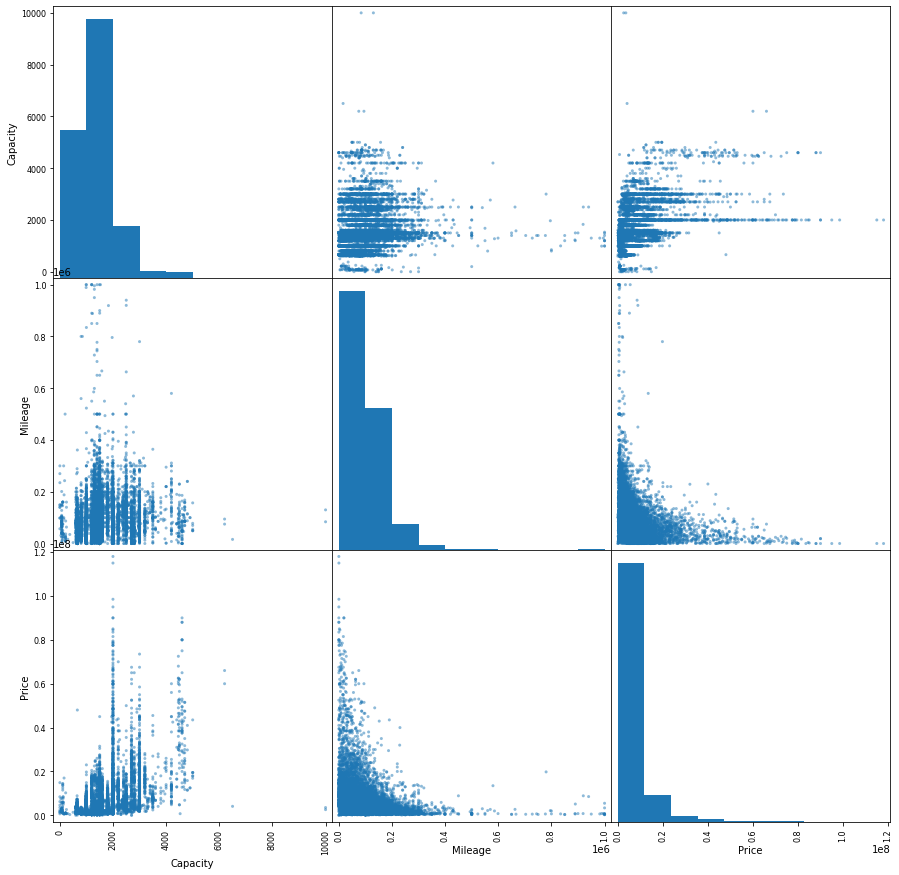

In [34]:
features_visualised = scatter_matrix(copy_df, figsize=(15, 15))

I can see from the above visualisations that the only real feature that is kind of a good predictor of **Price** is **Capacity**. However, certainly not massively so. I want to computer the Pearson coefficient to get a better understanding of the correlation.

In [35]:
copy_df.corr()

,Capacity,Mileage,Price
Capacity,1.000000,0.175323,0.490094
Mileage,0.175323,1.000000,-0.265427
Price,0.490094,-0.265427,1.000000


As I suspected, **Capacity** is quite predictive of price, but also not massively so.

## Feature Engineering

In [36]:
copy_df['log_capacity'] = np.log(copy_df['Capacity'])
copy_df['capacity_sq'] = np.square(copy_df['Capacity'])

In [37]:
copy_df.corr()

,Capacity,Mileage,Price,log_capacity,capacity_sq
Capacity,1.000000,0.175323,0.490094,0.869922,0.930870
Mileage,0.175323,1.000000,-0.265427,0.190486,0.112639
Price,0.490094,-0.265427,1.000000,0.381037,0.473407
log_capacity,0.869922,0.190486,0.381037,1.000000,0.697731
capacity_sq,0.930870,0.112639,0.473407,0.697731,1.000000


The log of **Capacity** predicts **Price** quite well and the square of capacity kind of predicts price, however they're both highly correlated with capacity, of course. I'll include them, along with them multiplied together to see if they improve the models at all.

Below I have included the classes that will allow the Grid Search to insert the new features into the dataset during model selection. 

## Dataset Preperation

In [38]:
class InsertLogCapacity(BaseEstimator, TransformerMixin):

    def __init__(self, insert=True):
        self.insert = insert
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if self.insert:
            X['log_capacity'] = np.log(X['Capacity'])
            X = X.replace( [ np.inf, -np.inf ], np.nan )
        return X

In [39]:
class InsertCapacitySquared(BaseEstimator, TransformerMixin):

    def __init__(self, insert=True):
        self.insert = insert
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if self.insert:
            X['capacity_sq'] = np.square(X['Capacity'])
            X = X.replace( [ np.inf, -np.inf ], np.nan )
        return X

In [40]:
class TransformerFromHyperP(BaseEstimator, TransformerMixin):

    def __init__(self, transformer=None):
        self.transformer = transformer
        
    def fit(self, X, y=None):
        if self.transformer:
            self.transformer.fit(X, y)
        return self
    
    def transform(self, X, y=None):
        if self.transformer:
            return self.transformer.transform(X)
        else:
            return X

Now it's time to build the preprocessor. I want the Grid Search to try the dataset with and without the new features to see what's best. To be sure there are no NaNs that crop up from the calculations, use a SimpleImputer to replace NaNS with the mean. hen I want to try a number of different scalers, so I've included the class that Grid Search will use to test each scaler.

In [41]:
numeric_features = ['Capacity', 'Mileage']
nominal_features = ['Brand', 'Model', 'Year', 'Condition', 'Transmission', 'Body', 'Fuel']

preprocessor = ColumnTransformer([
        ('numeric', Pipeline([('log_capacity', InsertLogCapacity()),
                              ('capacity_squared', InsertCapacitySquared()),
                              ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
                              ('scaler', TransformerFromHyperP())]), 
        numeric_features),
        ('nominal', Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')), 
                          ('encoder', OneHotEncoder(handle_unknown='ignore'))]), 
                nominal_features)],
        remainder='passthrough')

In [42]:
# Take the target values out of the training and test sets
features = ['Brand', 'Model', 'Year', 'Condition', 'Transmission', 'Body', 
            'Fuel', 'Capacity', 'Mileage']
target = 'Price'
train_X = train_df[features]
test_X = test_df[features]

train_y = train_df[target]
test_y = test_df[target]

## Model Selection

To begin, I want to create a K-Nearest-Neighbour model.

In [43]:
# Create the pipeline containing my preprocessor and regressor to build the KNN model
knn_model = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", KNeighborsRegressor())])

In [44]:
# Grid Search to try different values for k-neighbours, try the dataset with and without the new features, 
# and try three different scalers.
knn_param_grid = {"predictor__n_neighbors": [1, 2],
                  "preprocessor__numeric__log_capacity__insert": [True, False],
                  "preprocessor__numeric__capacity_squared__insert": [True, False],
                  "preprocessor__numeric__scaler__transformer": [StandardScaler(), MinMaxScaler(), RobustScaler()]}

I wasn't sure if this would be a big enough dataset to use holdout for model selection. So I decided to go with k-fold cross validation

In [45]:
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, scoring="neg_mean_absolute_error", cv=10)

In [46]:
knn_grid_search.fit(train_X, train_y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('log_capacity',
                                                                                          InsertLogCapacity()),
                                                                                         ('capacity_squared',
                                                                                          InsertCapacitySquared()),
                                                                                         ('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
    

In [47]:
knn_grid_search.best_params_, knn_grid_search.best_score_

({'predictor__n_neighbors': 2,
  'preprocessor__numeric__capacity_squared__insert': False,
  'preprocessor__numeric__log_capacity__insert': False,
  'preprocessor__numeric__scaler__transformer': StandardScaler()},
 -1011432.1044322565)

I ran the KNN regressor with neighbour values of 1-10. Each run used 2 neighbours at a time to reduce the time spent executing. Example: first run: n_neighbours = 1, 2 second run: n_neighbours = 3, 4.... last run: n_neighbours = 9, 10. I took note of the errors produced from the best neighbour hyperparamameter. This led me to determine that the best choice of neighbour was 2. I have included the results of all the KNN runs below:


| n_neighbours | Best Neighbour Value | Error Estimation (approx.=) |
| ------------ | -------------------- | --------------------------- |
| 1, 2         | 2                    | 1011432                     |
| 3, 4         | 3                    | 1019865                     |
| 5, 6         | 5                    | 1043632                     |
| 7, 8         | 7                    | 1078012                     |
| 9, 10        | 9                    | 1116062                     |

Now to test for over/underfitting. I need to run the regressor with the best hyperparameters to get the training and validation errors.

In [48]:
knn_model.set_params(**knn_grid_search.best_params_)
scores = cross_validate(knn_model, train_X, train_y, cv=10, scoring="neg_mean_absolute_error", return_train_score=True)
print("Training error: ", np.mean(np.abs(scores["train_score"])))
print("Validation error: ", np.mean(np.abs(scores["test_score"])))

Training error:  520832.1099882433
Validation error:  1011432.1044322565


This result leads me to believe that the model is overfitting the data. It seems that a training error of approximately 520000 is low and a validation error of approximately 1.01 million is high. To get a better sense of what high and low are, I'll create and run linear regression to see what results it gives.

In [49]:
linear_model = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", LinearRegression())])

In [50]:
linear_param_grid = {
                  "preprocessor__numeric__log_capacity__insert": [True, False],
                  "preprocessor__numeric__capacity_squared__insert": [True, False],
                  "preprocessor__numeric__scaler__transformer": [StandardScaler(), MinMaxScaler(), RobustScaler()]}

In [51]:
linear_grid_search = GridSearchCV(linear_model, linear_param_grid, scoring="neg_mean_absolute_error", cv=10)

In [52]:
linear_grid_search.fit(train_X, train_y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('log_capacity',
                                                                                          InsertLogCapacity(insert=False)),
                                                                                         ('capacity_squared',
                                                                                          InsertCapacitySquared(insert=False)),
                                                                                         ('imputer',
                                                                                          SimpleImputer()),
                                                                                

In [53]:
linear_grid_search.best_params_, linear_grid_search.best_score_

({'preprocessor__numeric__capacity_squared__insert': False,
  'preprocessor__numeric__log_capacity__insert': False,
  'preprocessor__numeric__scaler__transformer': StandardScaler()},
 -1646222.4704461372)

In [54]:
linear_model.set_params(**linear_grid_search.best_params_)
scores = cross_validate(linear_model, train_X, train_y, cv=10, scoring="neg_mean_absolute_error", return_train_score=True)
print("Training error: ", np.mean(np.abs(scores["train_score"])))
print("Validation error: ", np.mean(np.abs(scores["test_score"])))

Training error:  1542498.4693426697
Validation error:  1646222.4704461372


From the linear model, it seems there is less of a discrepancy between the training and validation errors. This leads me to think that the linear model will be a better model to use for the final test. However, I want to run ridge regression to see if it will fit the data better, which would mean the linear model is overfitting a bit.

In [55]:
ridge_model = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", Ridge())])

In [56]:
ridge_param_grid = {
                  "preprocessor__numeric__log_capacity__insert": [True, False],
                  "preprocessor__numeric__capacity_squared__insert": [True, False],
                  "preprocessor__numeric__scaler__transformer": [StandardScaler(), MinMaxScaler(), RobustScaler()],
                  "predictor__alpha": [0, 45.0, 50.0, 55.0]}

In [57]:
ridge_grid_search = GridSearchCV(ridge_model, ridge_param_grid, scoring="neg_mean_absolute_error", cv=10)

In [58]:
ridge_grid_search.fit(train_X, train_y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('log_capacity',
                                                                                          InsertLogCapacity(insert=False)),
                                                                                         ('capacity_squared',
                                                                                          InsertCapacitySquared(insert=False)),
                                                                                         ('imputer',
                                                                                          SimpleImputer()),
                                                                                

In [59]:
ridge_grid_search.best_params_, ridge_grid_search.best_score_

({'predictor__alpha': 0,
  'preprocessor__numeric__capacity_squared__insert': False,
  'preprocessor__numeric__log_capacity__insert': False,
  'preprocessor__numeric__scaler__transformer': MinMaxScaler()},
 -1646100.3309208103)

In [60]:
ridge_model.set_params(**ridge_grid_search.best_params_)
scores = cross_validate(ridge_model, train_X, train_y, cv=10, scoring="neg_mean_absolute_error", return_train_score=True)
print("Training error: ", np.mean(np.abs(scores["train_score"])))
print("Validation error: ", np.mean(np.abs(scores["test_score"])))

Training error:  1549957.5588861562
Validation error:  1646100.3309208103


The ridge model seems to increase the training error quite a bit and the validation error stays relatively the same. This leads me to the conclusion that the linear model is the best model for the final test, because the training error in the ridge model is high when compared to the linear model. This may be a symptom of underfitting from the ridge model.

My conclusion would be that the KNN model just overfits the data too much. I could use techniques to reduce the complexity. However I don't have any more training examples to work with, I feel that I removed the appropriate amount of noise before I even created the models, and I don't think reducing the number of features would be enough to reduce the massive discrepancy between the training and validation error.

The ridge model increases the training error quite a bit and only decreases the validation error a small bit, compared to the linear model. However, if the linear model was overfitting, I would have expected both the training and validation errors to come down. This would leave me to conclude that the linear model is the best model to use on the test set. In the linear model, the higher validation error is quite negligible in my opinion (approx. Rs 405) and the training error is lower.

## Run the model on the test set

In [61]:
linear_model.set_params(**linear_grid_search.best_params_)
linear_model.fit(train_X, train_y)
mean_absolute_error(test_y, linear_model.predict(test_X))

1723888.2627638176

In [62]:
linear_model.fit(df[features], df['Price'])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('log_capacity',
                                                                   InsertLogCapacity(insert=False)),
                                                                  ('capacity_squared',
                                                                   InsertCapacitySquared(insert=False)),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   TransformerFromHyperP(transformer=StandardScaler()))]),
                                                  ['Capacity', 'Mileage']),
                               

In [63]:
dump(linear_model, 'car_prices_in_sri_lanka.pk1')

['car_prices_in_sri_lanka.pk1']